# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [17]:
# Load the data
df = pd.read_csv("Auto.csv")

# Fit the Regression
df_fit = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', df).fit()
print(df_fit.summary())

# Transform Qualitative Values to Binary Values
#dummy = pd.get_dummies(df.iloc[:, [7,10,11]])
#df = df.merge(dummy, left_index=True, right_index=True)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        19:44:25   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [18]:
# Residual, QQ Plot, Location-Scale, Leverage plots

In [19]:
# Asthetics of plotting

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [20]:
# Residuals Plot

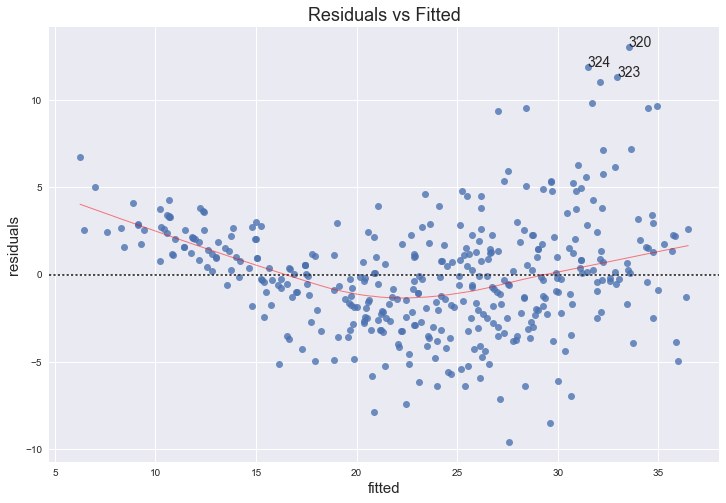

In [21]:
df_residuals = df_fit.resid
df_fitted = df_fit.fittedvalues
df_abs_residuals = np.abs(df_residuals)

plt_lm_1 = plt.figure(1)
plt_lm_1.set_figheight(8)
plt_lm_1.set_figwidth(12)

plt_lm_1.axes[0] = sns.residplot(df_fitted, df_residuals, lowess=True, 
                                 line_kws={'color' : 'red', 'alpha' : 0.5, 'lw' : 1})

plt_lm_1.axes[0].set_title('Residuals vs Fitted')
plt_lm_1.axes[0].set_xlabel('fitted')
plt_lm_1.axes[0].set_ylabel('residuals')

df_abs_residuals = df_abs_residuals.sort_values(ascending=False)
df_abs_residuals_top3 = df_abs_residuals[:3]

for i in df_abs_residuals_top3.index:
    plt_lm_1.axes[0].annotate(i, xy = (df_fitted[i],df_residuals[i]));

In [22]:
# QQ Plot

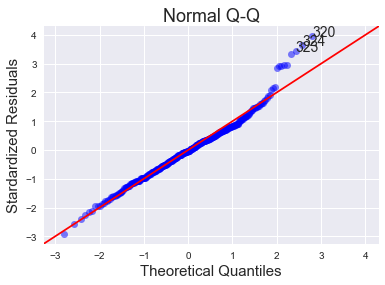

In [33]:
from statsmodels.graphics.gofplots import ProbPlot

df_norm_residuals = df_fit.get_influence().resid_studentized_internal
df_norm_residuals_abs = np.abs(df_norm_residuals)
df_norm_residuals_top3 = np.flipud(np.argsort(df_norm_residuals_abs))[:3]

plt_lm_2 = plt.figure(2)
plt_lm_2.set_figheight(8)
plt_lm_2.set_figwidth(12)

QQ = ProbPlot(df_norm_residuals)
plt_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

plt_lm_2.axes[0].set_title('Normal Q-Q')
plt_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plt_lm_2.axes[0].set_ylabel('Stardardized Residuals')

for r, i in enumerate(df_norm_residuals_top3):
    plt_lm_2.axes[0].annotate(i, xy = (np.flipud(QQ.theoretical_quantiles)[r], df_norm_residuals[i]));

In [34]:
# Scale - Location Plot

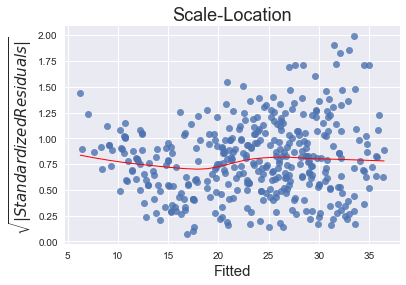

In [35]:
df_abs_sqrt_norm_resid = np.sqrt(np.abs(df_norm_residuals))

plt_lm_3 = plt.figure(3)

sns.regplot(df_fitted, df_abs_sqrt_norm_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})

plt_lm_3.axes[0].set_title('Scale-Location')
plt_lm_3.axes[0].set_xlabel('Fitted')
plt_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

In [36]:
# Leverage

380

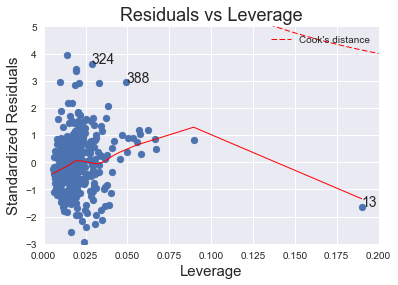

In [37]:
df_leverage = df_fit.get_influence().hat_matrix_diag
df_cooks = df_fit.get_influence().cooks_distance[0]

plt_lm_4 = plt.figure(4)

plt.scatter(df_leverage, df_norm_residuals)
sns.regplot(df_leverage, df_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color':'red', 'lw':1})

plt_lm_4.axes[0].set_xlim(0, 0.20)
plt_lm_4.axes[0].set_ylim(-3, 5)
plt_lm_4.axes[0].set_title('Residuals vs Leverage')
plt_lm_4.axes[0].set_xlabel('Leverage')
plt_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
df_leverage_top_3 = np.flipud(np.argsort(df_cooks))[:3]

for i in df_leverage_top_3:
    plt_lm_4.axes[0].annotate(i, 
                               xy=(df_leverage[i], 
                                   df_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x1 = x_range
    y1 = formula(x1)
    plt.plot(x1, y1, label=label, lw=1, ls='--', color='red')

p = len(df_fit.params) # number of model parameters

graph(lambda x1: np.sqrt((0.5 * p * (1 - x1)) / x1), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x1: np.sqrt((1 * p * (1 - x1)) / x1), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');


average_obs_leverage = (2+1)/400
#(p+1)/n = (2+1)/400 = 0.0075
np.sum(df_leverage > average_obs_leverage)